# Inverting log-signatures

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from esig import tosig

import base
import logsig_inversion
from utils.leadlag import leadlag

## Generate path

In [2]:
# Pip size
pip = 0.01

# Number of pips for search space
n_pips = 10

# Number of points
n_points = 21

path = np.r_[0., pip * np.random.randint(-n_pips, n_pips, size=n_points - 1).cumsum()]

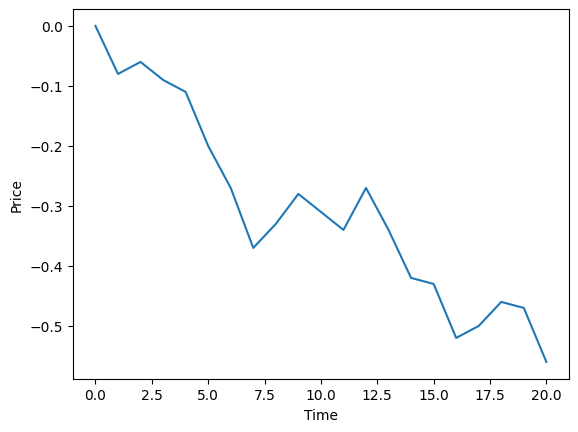

In [3]:
plt.plot(path)
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [4]:
# Compute log-signature

order = 4
leadlag_path = leadlag(path)
logsig = tosig.stream2logsig(leadlag_path, order)

print(f"Log-signature: {logsig}")

Log-signature: [-5.60000000e-01 -5.60000000e-01 -3.58000000e-02  8.01333333e-04
  1.53066667e-03  9.12900000e-05  1.77018333e-04  6.63500000e-05]


## Invert log-signature

In [5]:
n_iterations = 100
n_organisms = 1000
recovered_path, loss = logsig_inversion.train(logsig, order, n_iterations, n_organisms, n_points,
                                              pip, n_pips)

Loss: 0.00429683310889271: 100%|██████████| 100/100 [00:16<00:00,  6.10it/s]


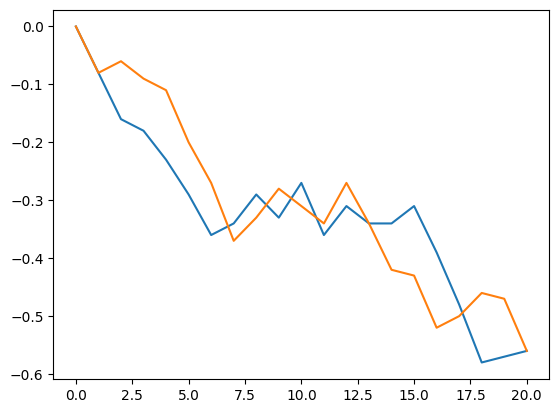

Real log-signature: [-5.60000000e-01 -5.60000000e-01 -3.58000000e-02  8.01333333e-04
  1.53066667e-03  9.12900000e-05  1.77018333e-04  6.63500000e-05]
Recovered log-signature: [-5.60000000e-01 -5.60000000e-01 -3.47000000e-02  8.21833333e-04
  1.53416667e-03  9.67550000e-05  1.77044167e-04  6.24850000e-05]


In [6]:
plt.plot(recovered_path)
plt.plot(path)
plt.show()
print(f"Real log-signature: {logsig}")
print(f"Recovered log-signature: {tosig.stream2logsig(leadlag(recovered_path), order)}")